# Data Cleaning
Aqui vamos realizar toda a etapa de limpeza dos dados para nossa analise de dados



# Importando bibliotecas


In [100]:
# bibliotecas
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [2]:
# importar os conjuntos de dados

# game: Reúne os registros de cada jogo no conjunto de dados
game = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game.csv")

# game_golie_stats: As estatísticas dos goleiros que participaram dos jogos
game_golie_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_goalie_stats.csv")

# game_plays: As jogadas individuais de cada jogo
#game_plays = pd.read_csv("https://dl.dropbox.com/s/r34sk4632lphbcz/game_plays.csv?dl=0")
    
# game_plays_player: Os jogadores envolvidos em uma jogada
#game_plays_player = pd.read_csv("https://dl.dropbox.com/s/9bafo0bjc1fs7wm/game_plays_players.csv?dl=0")
    
# game_shifts: Detalhes a respeito dos turnos dos jogadores
#game_shifts = pd.read_csv("https://dl.dropbox.com/s/j8s06eo3osisrr0/game_shifts.csv?dl=0")

# game_skater_stats: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time
#game_skater_stats = pd.read_csv("https://dl.dropbox.com/s/apvje2rso032qjm/game_skater_stats.csv?dl=0")

# game_teams_stats: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe
game_teams_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_teams_stats.csv")

# player_info: Informações sobre os jogadores
player_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/player_info.csv")

# team_info: informação sobre as equipes
team_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/team_info.csv")

In [3]:
game.head(3)

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT


In [22]:
team_info.head(3)

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26


In [4]:
game_teams_stats.head(3)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [5]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


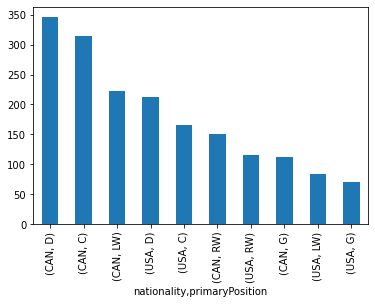

In [6]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

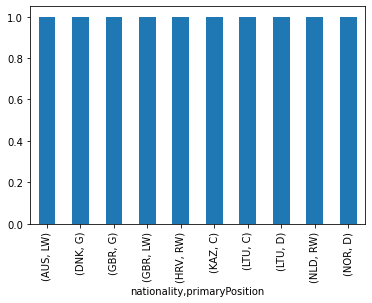

In [7]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values()[:10].plot(kind='bar')

In [8]:
table = player_info.groupby(['nationality'])['primaryPosition'].value_counts().to_frame()

In [9]:
table = table.unstack()

In [10]:
table.fillna(0, inplace=True)

In [11]:
table.rename(columns={'primaryPosition':'num_jogadores'}, inplace=True)

In [12]:
table

num_jogadores                            
primaryPosition             C      D      G     LW     RW
nationality                                              
AUS                       0.0    0.0    0.0    1.0    0.0
AUT                       0.0    0.0    0.0    2.0    2.0
BHS                       1.0    0.0    0.0    0.0    0.0
BLR                       1.0    3.0    0.0    2.0    0.0
CAN                     314.0  346.0  113.0  223.0  150.0
CHE                       4.0    9.0    3.0    2.0    6.0
CZE                      20.0   30.0   13.0   10.0   23.0
DEU                       6.0    4.0    5.0    3.0    2.0
DNK                       4.0    2.0    1.0    2.0    5.0
FIN                      21.0   25.0   20.0   19.0   15.0
FRA                       2.0    2.0    0.0    2.0    0.0
GBR                       0.0    0.0    1.0    1.0    0.0
HRV                       0.0    0.0    0.0    0.0    1.0
KAZ                       1.0    0.0    0.0    0.0    0.0
LTU                       1.0    1.0    0.0    0.0    0.0
LVA                       2.0    3.0    2.0    4.0    0.0
NGA                       0.0    0.0    0.0    0.0    1.0
NLD                       0.0    0.0    0.0    0.0    1.0
NOR                       0.0    1.0    0.0    1.0    1.0
RUS                      19.0   30.0   11.0   16.0   23.0
SVK                       5.0    9.0    2.0    4.0    5.0
SVN                       1.0    0.0    0.0    1.0    0.0
SWE                      43.0   65.0   22.0   34.0   20.0
UKR                       0.0    1.0    0.0    2.0    0.0
USA                     165.0  212.0   71.0   83.0  116.0

In [173]:
teste = pd.merge(game, game_teams_stats, on='game_id')

In [174]:
teste.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [184]:
team_dict = team_info.set_index('team_id')['teamName'].to_dict()


In [185]:
team_dict

{1: 'Devils',
 4: 'Flyers',
 26: 'Kings',
 14: 'Lightning',
 6: 'Bruins',
 3: 'Rangers',
 5: 'Penguins',
 17: 'Red Wings',
 28: 'Sharks',
 18: 'Predators',
 23: 'Canucks',
 16: 'Blackhawks',
 9: 'Senators',
 8: 'Canadiens',
 30: 'Wild',
 15: 'Capitals',
 19: 'Blues',
 24: 'Ducks',
 27: 'Coyotes',
 2: 'Islanders',
 10: 'Maple Leafs',
 13: 'Panthers',
 7: 'Sabres',
 20: 'Flames',
 21: 'Avalanche',
 25: 'Stars',
 29: 'Blue Jackets',
 52: 'Jets',
 22: 'Oilers',
 54: 'Golden Knights',
 12: 'Hurricanes',
 53: 'Coyotes',
 11: 'Thrashers'}

In [188]:
# aplicando no nosso DataFrame
teste['team_id'].replace(team_dict, inplace=True)
teste['team_id'].replace(team_dict, inplace=True)

In [189]:
teste.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,Devils,Flyers,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,Devils,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,Devils,Flyers,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,Flyers,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,Devils,Flyers,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,Devils,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,Devils,Flyers,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,Flyers,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,Flyers,Devils,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,Flyers,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [176]:
final.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,franchiseId,shortName,teamName,abbreviation,link
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,23,New Jersey,Devils,NJD,/api/v1/teams/1
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,1,home,True,OT,Peter DeBoer,4,31,30,10,2,1,49.2,11,4,23,New Jersey,Devils,NJD,/api/v1/teams/1
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,1,home,True,REG,Peter DeBoer,4,43,19,4,5,1,37.5,5,3,23,New Jersey,Devils,NJD,/api/v1/teams/1
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,3,30,26,2,4,1,55.0,6,5,23,New Jersey,Devils,NJD,/api/v1/teams/1


In [191]:
teste['team_id'].value_counts()

Penguins          815
Bruins            812
Sharks            805
Capitals          804
Rangers           802
Blackhawks        793
Lightning         790
Blues             788
Predators         787
Kings             783
Ducks             774
Canadiens         751
Red Wings         751
Wild              748
Senators          746
Flyers            745
Canucks           744
Stars             736
Islanders         736
Devils            733
Blue Jackets      731
Maple Leafs       731
Avalanche         729
Flames            724
Coyotes           724
Hurricanes        719
Panthers          717
Oilers            717
Sabres            711
Jets              649
Golden Knights    191
Thrashers          82
Name: team_id, dtype: int64

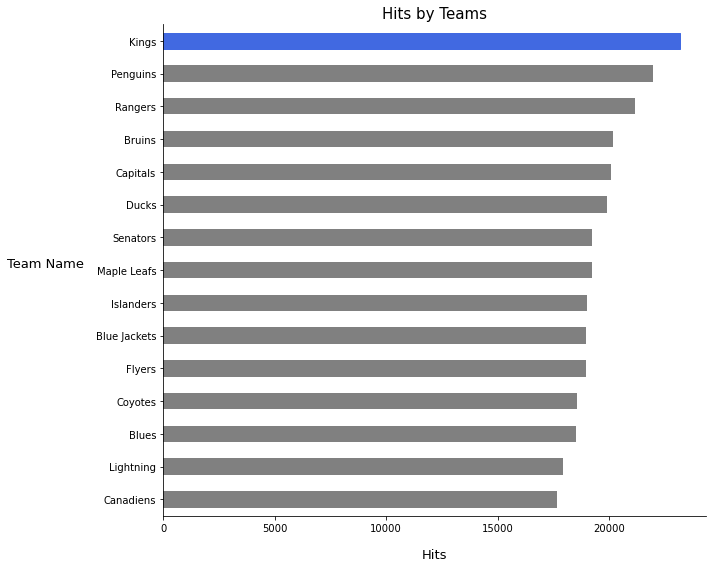

In [196]:
teams_hits = teste.groupby(['team_id'])['hits'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(10, 8))
teams_hits.sort_values().plot(kind='barh', color='gray', ax=ax)
# nomeando
ax.set_title("Hits by Teams", fontsize=15)
ax.set_ylabel("Team Name",fontsize=13, rotation= 0, labelpad=50)
ax.set_xlabel("Hits", fontsize=13, labelpad=15)


# estilizando
ax.patches[14].set_color('royalblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

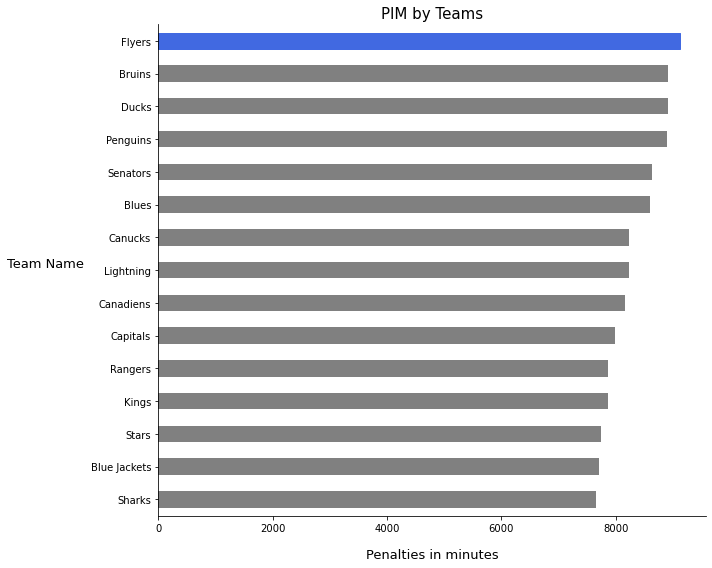

In [194]:
teams_pim = teste.groupby(['team_id'])['pim'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(10, 8))
teams_pim.sort_values().plot(kind='barh', color='gray', ax=ax)
# nomeando
ax.set_title("PIM by Teams", fontsize=15)
ax.set_ylabel("Team Name",fontsize=13, rotation= 0, labelpad=45)
ax.set_xlabel("Penalties in minutes", fontsize=13, labelpad=15)

# estilizando
ax.patches[14].set_color('royalblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

In [180]:
final.columns

Index(['game_id', 'season', 'type', 'date_time', 'date_time_GMT',
       'away_team_id', 'home_team_id', 'away_goals', 'home_goals', 'outcome',
       'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
       'venue_time_zone_offset', 'venue_time_zone_tz', 'team_id', 'HoA', 'won',
       'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'giveaways', 'takeaways', 'franchiseId', 'shortName', 'teamName',
       'abbreviation', 'link'],
      dtype='object')

In [288]:
cols_drop = ['date_time_GMT', 'outcome', 'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
             'venue_time_zone_offset', 'venue_time_zone_tz']

In [289]:
nhl_eda = teste.drop(labels=cols_drop, axis=1)

In [290]:
nhl_eda.head(10)

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Flyers,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,Flyers,Devils,3,4,Flyers,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1
5,2011030223,20112012,P,2012-05-03,Flyers,Devils,3,4,Devils,home,True,OT,Peter DeBoer,4,31,30,10,2,1,49.2,11,4
6,2011030224,20112012,P,2012-05-06,Flyers,Devils,2,4,Flyers,away,False,REG,Peter Laviolette,2,22,23,10,2,1,62.5,20,5
7,2011030224,20112012,P,2012-05-06,Flyers,Devils,2,4,Devils,home,True,REG,Peter DeBoer,4,43,19,4,5,1,37.5,5,3
8,2011030225,20112012,P,2012-05-08,Devils,Flyers,3,1,Devils,away,True,REG,Peter DeBoer,3,30,26,2,4,1,55.0,6,5
9,2011030225,20112012,P,2012-05-08,Devils,Flyers,3,1,Flyers,home,False,REG,Peter Laviolette,1,28,38,8,1,0,45.0,14,7


In [291]:
nhl_eda['outcome'] = nhl_eda['won'].map({False:0, True:1})

In [344]:
nhl_eda.head()

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,0
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4,1
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,1
3,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Flyers,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6,0
4,2011030223,20112012,P,2012-05-03,Flyers,Devils,3,4,Flyers,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1,0


In [338]:
nhl_eda.columns

Index(['game_id', 'season', 'type', 'date_time', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'team_id', 'HoA', 'won',
       'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'giveaways', 'takeaways', 'outcome'],
      dtype='object')

In [293]:
team_wins = nhl_eda[nhl_eda['outcome']== 1]
team_lost = nhl_eda[nhl_eda['outcome']== 0]

In [304]:
x = team_wins.groupby(['team_id'])['outcome'].value_counts()

In [305]:
y = team_lost.groupby(['team_id'])['outcome'].value_counts()

In [306]:
combine = pd.merge(x, y, on='team_id')

In [309]:
combine['total'] = combine['outcome_x'] + combine['outcome_y']

In [315]:
combine = combine.rename(columns={'outcome_x':"vitorias", 'outcome_y':'derrotas', 'total':'total_jogos'})

In [317]:
combine['%_vitorias'] = combine['vitorias']/combine['total_jogos']

In [331]:
combine

,vitorias,derrotas,total_jogos,%_vitorias
team_id,,,,
Avalanche,332,397,729,0.455418
Blackhawks,436,357,793,0.549811
Blue Jackets,359,372,731,0.491108
Blues,445,343,788,0.564721
Bruins,465,347,812,0.572660
Canadiens,380,371,751,0.505992
Canucks,360,384,744,0.483871
Capitals,461,343,804,0.573383
Coyotes,309,415,724,0.426796


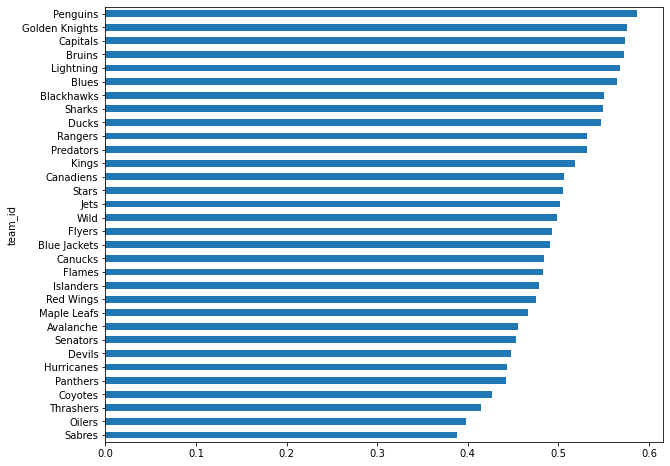

In [325]:
combine['%_vitorias'].sort_values().plot(kind='barh', figsize=(10, 8))

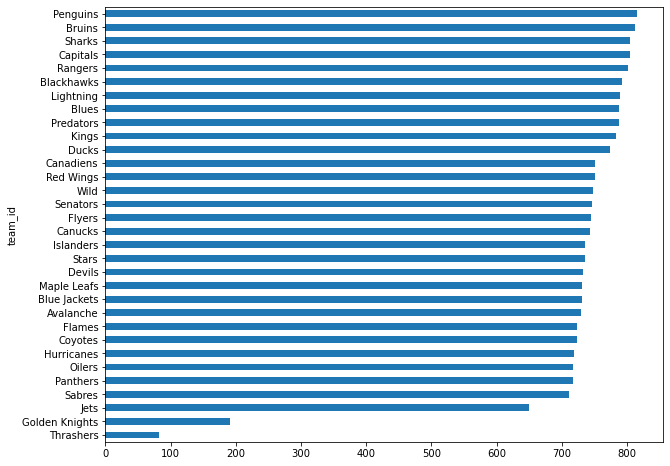

In [327]:
combine['total_jogos'].sort_values().plot(kind='barh', figsize=(10, 8))

In [337]:
nhl_eda.groupby(['team_id'])['goals'].mean()

team_id
Avalanche         2.672154
Blackhawks        2.950820
Blue Jackets      2.745554
Blues             2.760152
Bruins            2.972906
Canadiens         2.655126
Canucks           2.603495
Capitals          2.919154
Coyotes           2.476519
Devils            2.407913
Ducks             2.749354
Flames            2.776243
Flyers            2.836242
Golden Knights    3.120419
Hurricanes        2.605007
Islanders         2.777174
Jets              2.878274
Kings             2.577267
Lightning         3.055696
Maple Leafs       2.848153
Oilers            2.578801
Panthers          2.594142
Penguins          3.082209
Predators         2.761118
Rangers           2.741895
Red Wings         2.684421
Sabres            2.400844
Senators          2.689008
Sharks            2.877019
Stars             2.794837
Thrashers         2.658537
Wild              2.605615
Name: goals, dtype: float64

In [329]:
nhl_eda.groupby(['away_team_id'])['away_goals'].sum()

away_team_id
Avalanche         1858
Blackhawks        2250
Blue Jackets      1978
Blues             2138
Bruins            2360
Canadiens         1946
Canucks           1904
Capitals          2306
Coyotes           1744
Devils            1726
Ducks             2010
Flames            1830
Flyers            2050
Golden Knights     552
Hurricanes        1846
Islanders         1978
Jets              1734
Kings             1988
Lightning         2278
Maple Leafs       2012
Oilers            1852
Panthers          1780
Penguins          2420
Predators         2090
Rangers           2164
Red Wings         2002
Sabres            1690
Senators          2000
Sharks            2242
Stars             1958
Thrashers          234
Wild              1890
Name: away_goals, dtype: int64

In [330]:
nhl_eda.groupby(['home_team_id'])['home_goals'].sum()

home_team_id
Avalanche         2120
Blackhawks        2516
Blue Jackets      2124
Blues             2300
Bruins            2534
Canadiens         2116
Canucks           2056
Capitals          2468
Coyotes           1920
Devils            1874
Ducks             2320
Flames            2252
Flyers            2234
Golden Knights     654
Hurricanes        1948
Islanders         2202
Jets              2068
Kings             2122
Lightning         2630
Maple Leafs       2226
Oilers            1914
Panthers          2034
Penguins          2694
Predators         2330
Rangers           2314
Red Wings         2116
Sabres            1812
Senators          2090
Sharks            2484
Stars             2216
Thrashers          212
Wild              2088
Name: home_goals, dtype: int64

In [332]:
team_wins_home = nhl_eda[(nhl_eda['outcome']== 1) & (nhl_eda['HoA']=='home')]

In [334]:
team_wins_home.groupby(['team_id'])['outcome'].value_counts()

team_id         outcome
Avalanche       1          186
Blackhawks      1          240
Blue Jackets    1          188
Blues           1          239
Bruins          1          247
Canadiens       1          203
Canucks         1          194
Capitals        1          253
Coyotes         1          170
Devils          1          185
Ducks           1          237
Flames          1          194
Flyers          1          203
Golden Knights  1           62
Hurricanes      1          177
Islanders       1          179
Jets            1          179
Kings           1          225
Lightning       1          251
Maple Leafs     1          187
Oilers          1          155
Panthers        1          176
Penguins        1          264
Predators       1          232
Rangers         1          223
Red Wings       1          187
Sabres          1          149
Senators        1          180
Sharks          1          241
Stars           1          203
Thrashers       1           17
Wild           

In [335]:
team_lost_home = nhl_eda[(nhl_eda['outcome']== 0) & (nhl_eda['HoA']=='home')]

In [336]:
team_lost_home.groupby(['team_id'])['outcome'].value_counts()

team_id         outcome
Avalanche       0          178
Blackhawks      0          157
Blue Jackets    0          177
Blues           0          155
Bruins          0          163
Canadiens       0          172
Canucks         0          180
Capitals        0          149
Coyotes         0          193
Devils          0          180
Ducks           0          153
Flames          0          168
Flyers          0          170
Golden Knights  0           33
Hurricanes      0          182
Islanders       0          188
Jets            0          146
Kings           0          165
Lightning       0          145
Maple Leafs     0          177
Oilers          0          203
Panthers        0          183
Penguins        0          146
Predators       0          161
Rangers         0          178
Red Wings       0          185
Sabres          0          206
Senators        0          191
Sharks          0          162
Stars           0          165
Thrashers       0           24
Wild           